In [ ]:
!pip install nasdaq-data-link

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "t3EpzMuw5-SaJu7J3UBd"

<Axes: title={'center': 'Unemployment rate (US) - monthly'}, xlabel='Date'>

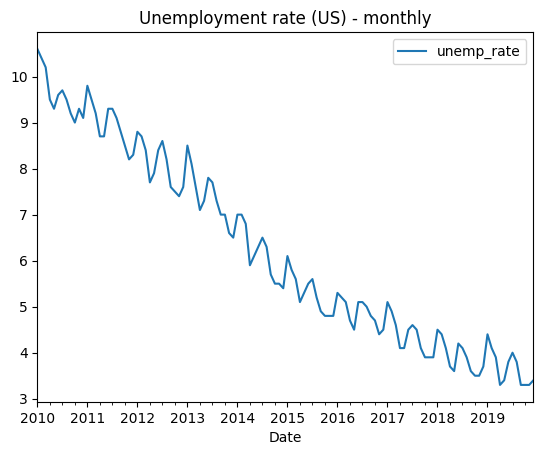

In [ ]:
df = (nasdaqdatalink.get(dataset = "FRED/UNRATENSA",
                         start_date = "2010-01-01",
                         end_date = "2019-12-31")
      .rename(columns = {"Value": "unemp_rate"}))
df.plot(title = "Unemployment rate (US) - monthly")

In [ ]:
df["linear_trend"] = range(len(df))
df["month"] = df.index.month

month_dummies = pd.get_dummies(df["month"], drop_first=True, prefix="month")
df = df.join(month_dummies) \
       .drop(columns=["month"])

df

,unemp_rate,linear_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,
2010-01-01,10.6,0,0,0,0,0,0,0,0,0,0,0,0
2010-02-01,10.4,1,1,0,0,0,0,0,0,0,0,0,0
2010-03-01,10.2,2,0,1,0,0,0,0,0,0,0,0,0
2010-04-01,9.5,3,0,0,1,0,0,0,0,0,0,0,0
2010-05-01,9.3,4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,3.8,115,0,0,0,0,0,0,1,0,0,0,0
2019-09-01,3.3,116,0,0,0,0,0,0,0,1,0,0,0
2019-10-01,3.3,117,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.copy()
y = X.pop("unemp_rate")

In [ ]:
expanding_cv = TimeSeriesSplit(n_splits=5, test_size=12)

for fold, (train_ind, valid_ind) in enumerate(expanding_cv.split(X)):
  print(f"Fold {fold} ----")
  print(f"Train indices: {train_ind}")
  print(f"Valid indices: {valid_ind}")

Fold 0 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Valid indices: [60 61 62 63 64 65 66 67 68 69 70 71]
Fold 1 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Valid indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Fold 2 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
Valid indices: [84 85 86 87 88 89 90 91 92 93 94 95]
Fold 3 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [ ]:
scores = []

for train_ind, valid_ind in expanding_cv.split(X):
  lr = LinearRegression()
  lr.fit(X.iloc[train_ind], y.iloc[train_ind])
  y_pred = lr.predict(X.iloc[valid_ind])
  scores.append(mean_absolute_percentage_error(y.iloc[valid_ind], y_pred))

print(f"Scores: {scores}")
print(f"Avg. score: {np.mean(scores)}")

Scores: [0.03705079312389487, 0.07828415627306319, 0.11981060282172921, 0.16829494012910826, 0.25460459651634104]
Avg. score: 0.13160901777282732


In [ ]:
cv_scores = cross_validate(
    LinearRegression(),
    X, y,
    cv=expanding_cv,
    scoring=["neg_mean_absolute_percentage_error", "neg_root_mean_squared_error"]
)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error
0,0.006308,0.004221,-0.037051,-0.232500
1,0.004433,0.002954,-0.078284,-0.433547
2,0.004319,0.003073,-0.119811,-0.520073
3,0.004612,0.002266,-0.168295,-0.662540
4,0.002976,0.001974,-0.254605,-0.928998


In [ ]:
sliding_cv = TimeSeriesSplit(n_splits=5, test_size=12, max_train_size=60)

for fold, (train_ind, valid_ind) in enumerate(sliding_cv.split(X)):
  print(f"Fold {fold} ----")
  print(f"Train indices: {train_ind}")
  print(f"Valid indices: {valid_ind}")

Fold 0 ----
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Valid indices: [60 61 62 63 64 65 66 67 68 69 70 71]
Fold 1 ----
Train indices: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Valid indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Fold 2 ----
Train indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
Valid indices: [84 85 86 87 88 89 90 91 92 93 94 95]
Fold 3 ----
Train indices: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 9

In [ ]:
cv_scores = cross_validate(
    LinearRegression(),
    X, y,
    cv=sliding_cv,
    scoring=["neg_mean_absolute_percentage_error", "neg_root_mean_squared_error"]
)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error
0,0.024639,0.024615,-0.037051,-0.232500
1,0.041646,0.021607,-0.097125,-0.524333
2,0.027082,0.025544,-0.126609,-0.550749
3,0.014668,0.003059,-0.129454,-0.518194
4,0.005296,0.047148,-0.108759,-0.407428


#Feature Engineering

In [ ]:
!pip install sklego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from datetime import date

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklego.preprocessing import RepeatingBasisFunction

<Axes: title={'center': 'Generated Time Series'}>

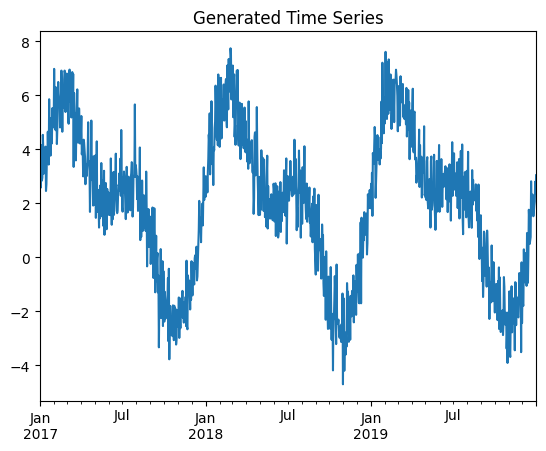

In [ ]:
np.random.seed(42)

range_of_dates = pd.date_range(start="2017-01-01",
                               end="2019-12-31")
X = pd.DataFrame(index=range_of_dates)

X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

signal_1 = 2 + 3*np.sin(X["day_nr"]/365*2*np.pi)
signal_2 = 2*np.sin(X["day_nr"]/365*4*np.pi + 365/2)
noise = np.random.normal(0, 0.81, len(X))

y = signal_1 + signal_2 + noise
y.name = "y"

y.plot(title="Generated Time Series")


In [ ]:
results_df = y.to_frame()
results_df.columns = ["y_true"]

In [ ]:
X_1 = pd.get_dummies(X.index.month, drop_first=True, prefix="month")
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,0,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,1
2019-12-28,0,0,0,0,0,0,0,0,0,0,1
2019-12-29,0,0,0,0,0,0,0,0,0,0,1
2019-12-30,0,0,0,0,0,0,0,0,0,0,1


<Axes: title={'center': 'Fit using month dummies'}>

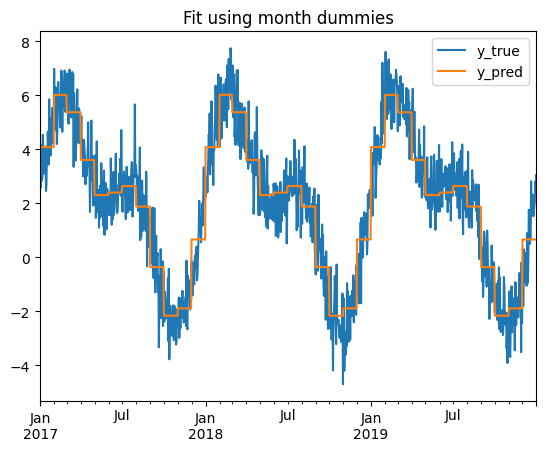

In [ ]:
model_1 = LinearRegression().fit(X_1, y)

results_df["y_pred"] = model_1.predict(X_1)
results_df[["y_true", "y_pred"]].plot(title="Fit using month dummies")

In [ ]:
def sin_transformer(period):
  return FunctionTransformer(lambda x: np.sin(x/period*2*np.pi))

def cos_transformer(period):
  return FunctionTransformer(lambda x: np.cos(x/period*2*np.pi))

Text(0.5, 0.98, 'Cyclical encoding with sine/cosine transformation')

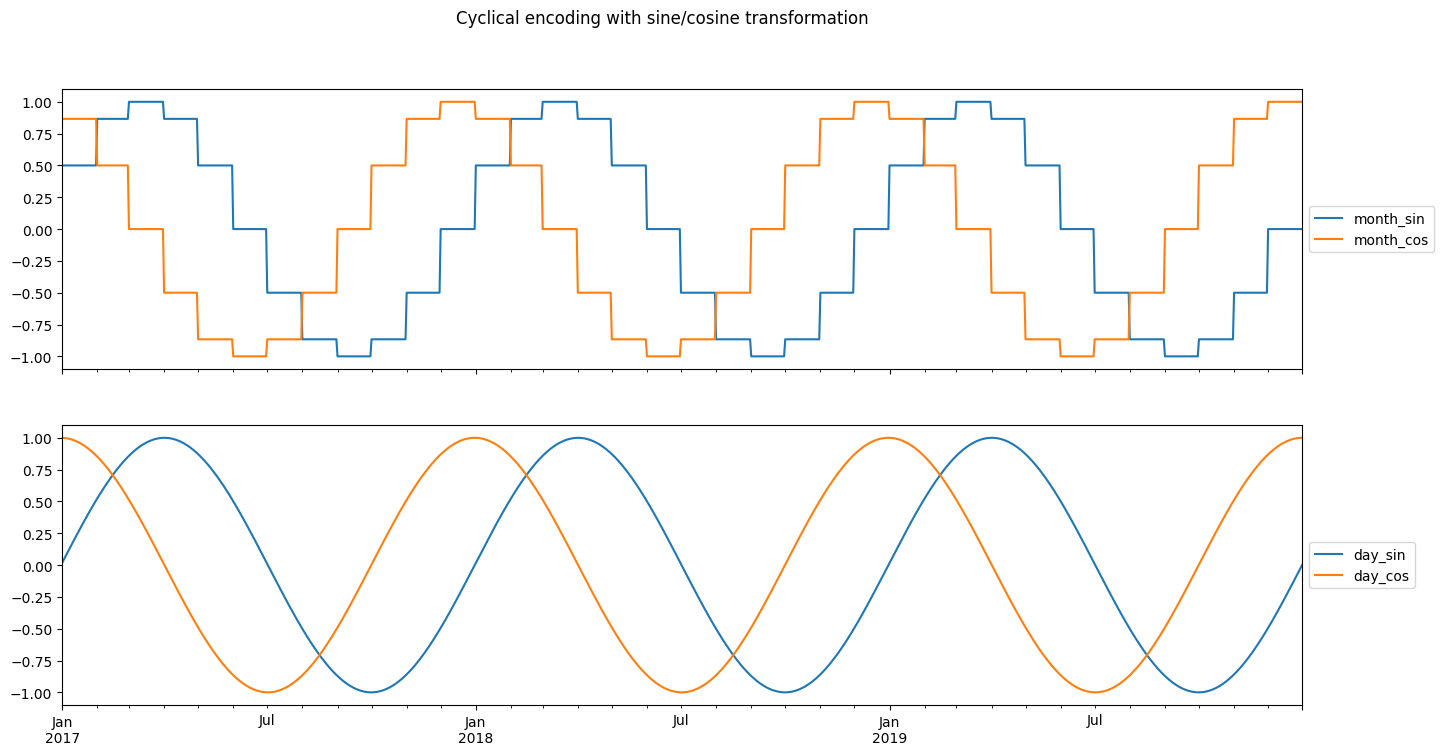

In [ ]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]
X_2["day_sin"] = (
    sin_transformer(365).fit_transform(X_2)["day_of_year"]
)
X_2["day_cos"] = (
    cos_transformer(365).fit_transform(X_2)["day_of_year"]
)

import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
ax[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.suptitle("Cyclical encoding with sine/cosine transformation")

<Axes: title={'center': 'Fit using sine/cosine features'}>

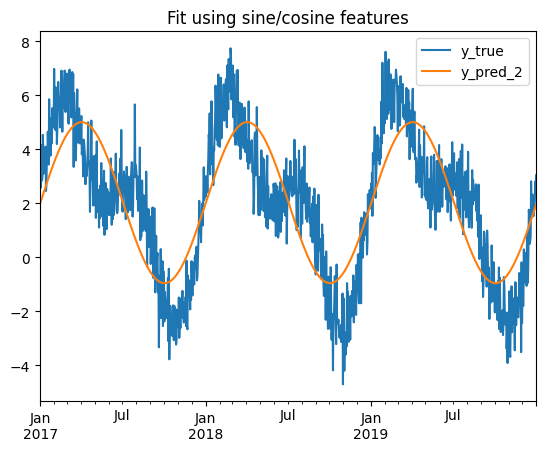

In [ ]:
X_2 = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2,y)

results_df["y_pred_2"] = model_2.predict(X_2)
results_df[["y_true", "y_pred_2"]].plot(title="Fit using sine/cosine features")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

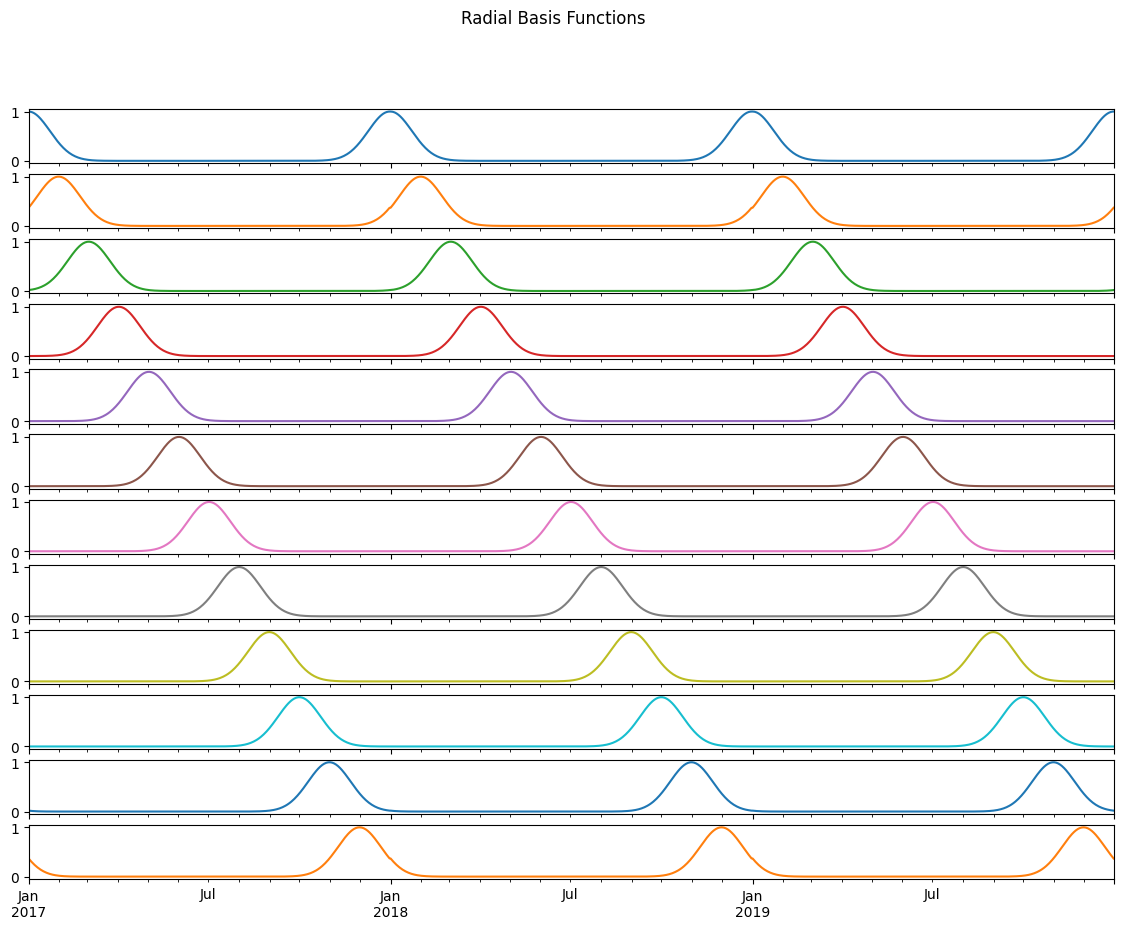

In [ ]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column="day_of_year",
                             input_range=(1,365),
                             remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index,
                   data=rbf.transform(X))
X_3.plot(subplots=True, sharex=True,
         title="Radial Basis Functions",
         legend=False, figsize=(14,10))

<Axes: title={'center': 'Fit using RBF features'}>

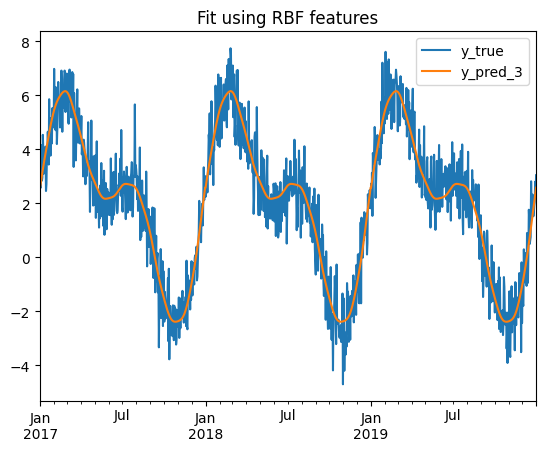

In [ ]:
model_3 = LinearRegression().fit(X_3, y)

results_df["y_pred_3"] = model_3.predict(X_3)
results_df[["y_true", "y_pred_3"]].plot(title="Fit using RBF features")

In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
from sktime.transformations.series.date import DateTimeFeatures

from tsfresh import extract_features
from tsfresh.feature_extraction import settings
from tsfresh.utilities.dataframe_functions import roll_time_series

In [ ]:
dt_features = DateTimeFeatures(ts_freq="D", feature_scope="comprehensive")
features_df_1 = dt_features.fit_transform(y)
features_df_1.head()

,year,quarter_of_year,month_of_year,week_of_year,day_of_year,month_of_quarter,week_of_quarter,day_of_quarter,week_of_month,day_of_month,day_of_week,is_weekend
2017-01-01,2017,1,1,52,1,1,1,1,1,1,6,1
2017-01-02,2017,1,1,1,2,1,2,2,1,2,0,0
2017-01-03,2017,1,1,1,3,1,2,3,1,3,1,0
2017-01-04,2017,1,1,1,4,1,2,4,1,4,2,0
2017-01-05,2017,1,1,1,5,1,2,5,1,5,3,0


In [ ]:
df = y.to_frame().reset_index(drop=False)
df.columns = ["date", "y"]
df["series_id"] = "a"

In [ ]:
df_rolled = roll_time_series(df, column_id="series_id", column_sort="date", max_timeshift=30, min_timeshift=7).drop(columns=["series_id"])
df_rolled

Rolling: 100%|██████████| 1095/1095 [00:04<00:00, 246.92it/s]


,date,y,id
0,2017-01-01,2.969692,"(a, 2017-01-08 00:00:00)"
1,2017-01-02,2.572678,"(a, 2017-01-08 00:00:00)"
2,2017-01-03,3.325853,"(a, 2017-01-08 00:00:00)"
3,2017-01-04,4.150575,"(a, 2017-01-08 00:00:00)"
4,2017-01-05,2.842004,"(a, 2017-01-08 00:00:00)"
...,...,...,...
33447,2019-12-27,1.914564,"(a, 2019-12-31 00:00:00)"
33448,2019-12-28,2.062146,"(a, 2019-12-31 00:00:00)"
33449,2019-12-29,2.801118,"(a, 2019-12-31 00:00:00)"
33450,2019-12-30,2.372868,"(a, 2019-12-31 00:00:00)"


In [ ]:
settings_minimal = settings.MinimalFCParameters()
settings_minimal

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [ ]:
features_df_2 = extract_features(df_rolled, column_id="id", column_sort="date", default_fc_parameters=settings_minimal)
features_df_2 = features_df_2.set_index(features_df_2.index.map(lambda x: x[1]), drop=True)
features_df_2.index.name = "last_date"
features_df_2.head(25)

Feature Extraction: 100%|██████████| 1088/1088 [00:01<00:00, 687.39it/s]


,y__sum_values,y__median,y__mean,y__length,y__standard_deviation,y__variance,y__root_mean_square,y__maximum,y__absolute_maximum,y__minimum
last_date,,,,,,,,,,
2017-01-08,27.344582,3.147773,3.418073,8.0,0.669595,0.448357,3.483042,4.537116,4.537116,2.572678
2017-01-09,30.443686,3.099104,3.382632,9.0,0.639209,0.408588,3.442497,4.537116,4.537116,2.572678
2017-01-10,34.471211,3.212478,3.447121,10.0,0.636521,0.405159,3.505396,4.537116,4.537116,2.572678
2017-01-11,37.791096,3.319885,3.435554,11.0,0.608001,0.369665,3.488939,4.537116,4.537116,2.572678
2017-01-12,41.214759,3.322869,3.434563,12.0,0.582125,0.338870,3.483546,4.537116,4.537116,2.572678
2017-01-13,45.315670,3.325853,3.485821,13.0,0.586797,0.344331,3.534866,4.537116,4.537116,2.572678
2017-01-14,47.773142,3.322869,3.412367,14.0,0.624401,0.389876,3.469024,4.537116,4.537116,2.457472
2017-01-15,50.483707,3.319885,3.365580,15.0,0.628117,0.394531,3.423691,4.537116,4.537116,2.457472
2017-01-16,54.234661,3.322869,3.389666,16.0,0.615284,0.378575,3.445056,4.537116,4.537116,2.457472


#TIME SERIES FORECASTING AS REDUCED REGRESSION

In [ ]:
!pip install sktime

In [ ]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split, ExpandingWindowSplitter
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster, EnsembleForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.arima import AutoARIMA
from sklearn.ensemble import RandomForestRegressor

##Change of dates:
Take back US unemployement data.

In [ ]:
!pip install nasdaq-data-link

In [ ]:
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "t3EpzMuw5-SaJu7J3UBd"
df = (nasdaqdatalink.get(dataset = "FRED/UNRATENSA",
                         start_date = "2010-01-01",
                         end_date = "2019-12-31")
      .rename(columns = {"Value": "unemp_rate"}))
df["linear_trend"] = range(len(df))
df["month"] = df.index.month

month_dummies = pd.get_dummies(df["month"], drop_first=True, prefix="month")
df = df.join(month_dummies) \
       .drop(columns=["month"])
X = df.copy()
y = X.pop("unemp_rate")

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='unemp_rate'>)

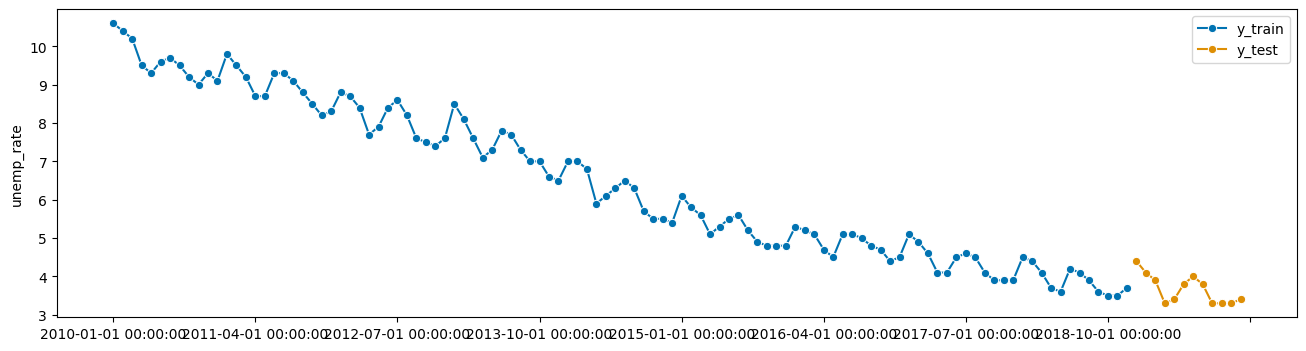

In [ ]:
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [ ]:
#NEED TO CHANGE THE FREQUENCY WRT CODE IN BOOK
y_test.index = pd.PeriodIndex(y_test.index, freq="M")
y_train.index = pd.PeriodIndex(y_train.index, freq="M")


fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', is_relative=False)

In [ ]:
regressor = RandomForestRegressor(random_state=42)
rf_forecaster = make_reduction(
    estimator=regressor,
    strategy="recursive",
    window_length=12
)
rf_forecaster.fit(y_train)
y_pred_1 = rf_forecaster.predict(fh=fh)

Text(0.5, 1.0, 'MAPE: 7.04%')

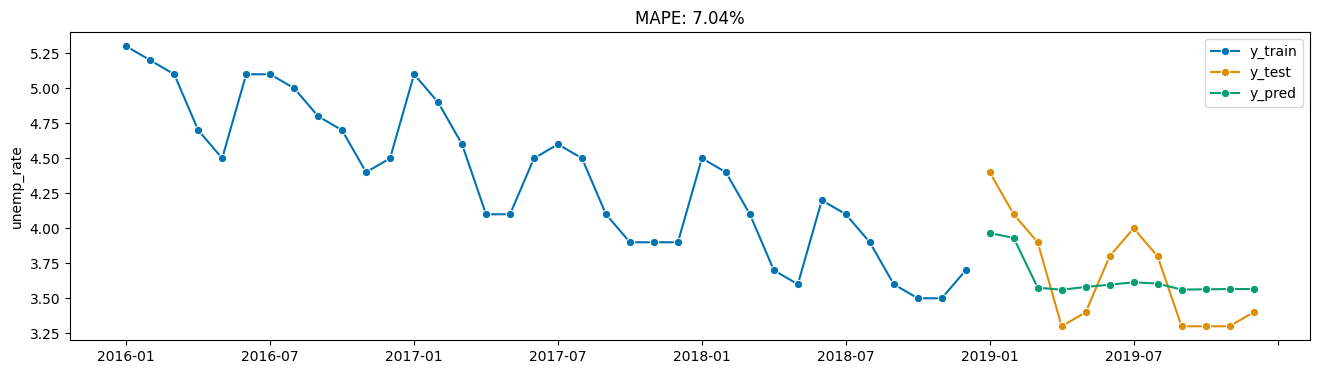

In [ ]:
mape_1 = mean_absolute_percentage_error(y_test, y_pred_1, symmetric=False)

fig,ax = plot_series(y_train["2016":], y_test, y_pred_1, labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_1:.2f}%")

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='unemp_rate'>)

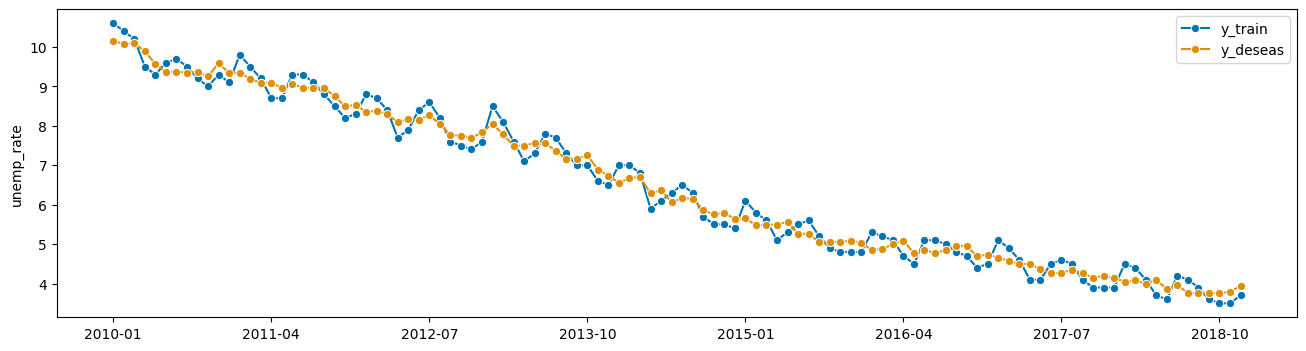

In [ ]:
deseasonalizer = Deseasonalizer(model="additive", sp=12)
y_deseas = deseasonalizer.fit_transform(y_train)
plot_series(y_train, y_deseas, labels=["y_train", "y_deseas"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='seasonal'>)

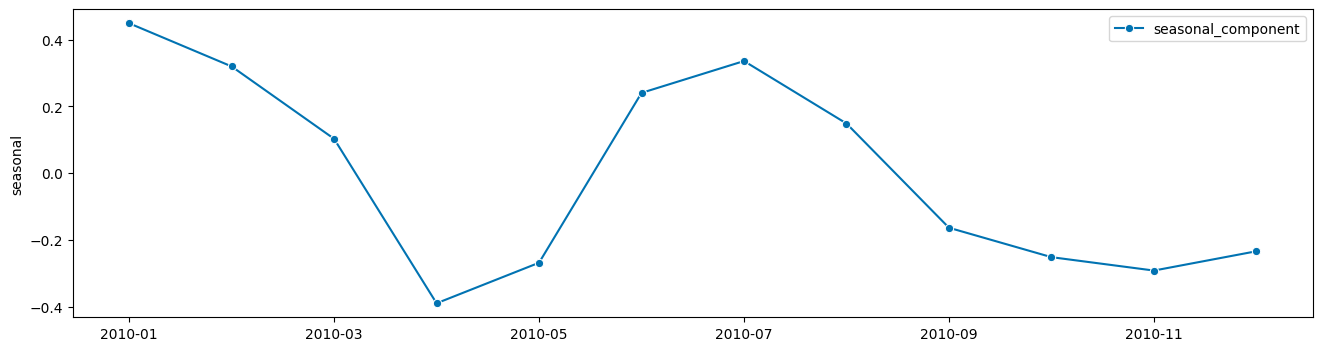

In [ ]:
plot_series(deseasonalizer.seasonal_, labels=["seasonal_component"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='unemp_rate'>)

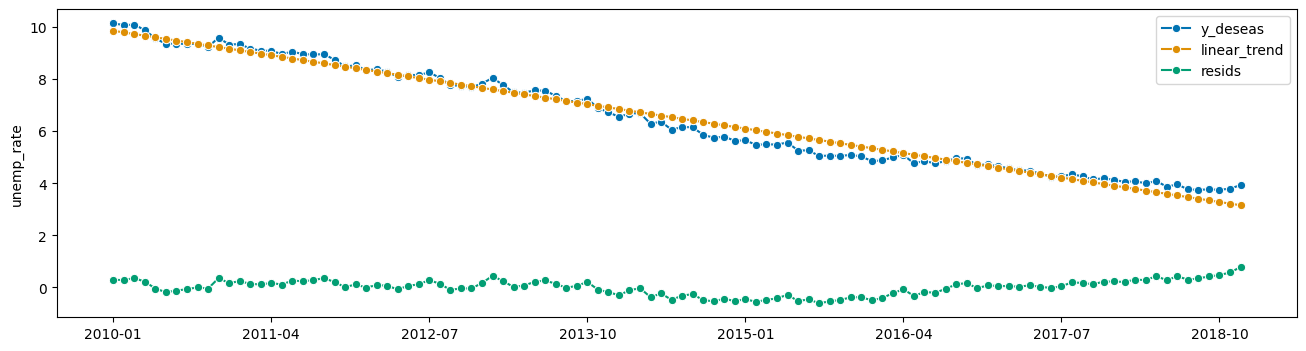

In [ ]:
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
y_detrend = transformer.fit_transform(y_deseas)

forecaster = PolynomialTrendForecaster(degree=1)
y_in_sample = (forecaster.fit(y_deseas).predict(fh=-np.arange(len(y_deseas))))
plot_series(y_deseas, y_in_sample, y_detrend, labels=["y_deseas", "linear_trend", "resids"])

In [ ]:
rf_pipe = TransformedTargetForecaster(steps=[("deseasonalize", Deseasonalizer(model="additive", sp=12)),
                                             ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
                                             ("forecast", rf_forecaster)]
                                    )
rf_pipe.fit(y_train)
y_pred_2 = rf_pipe.predict(fh)

Text(0.5, 1.0, 'MAPE: 7.40%')

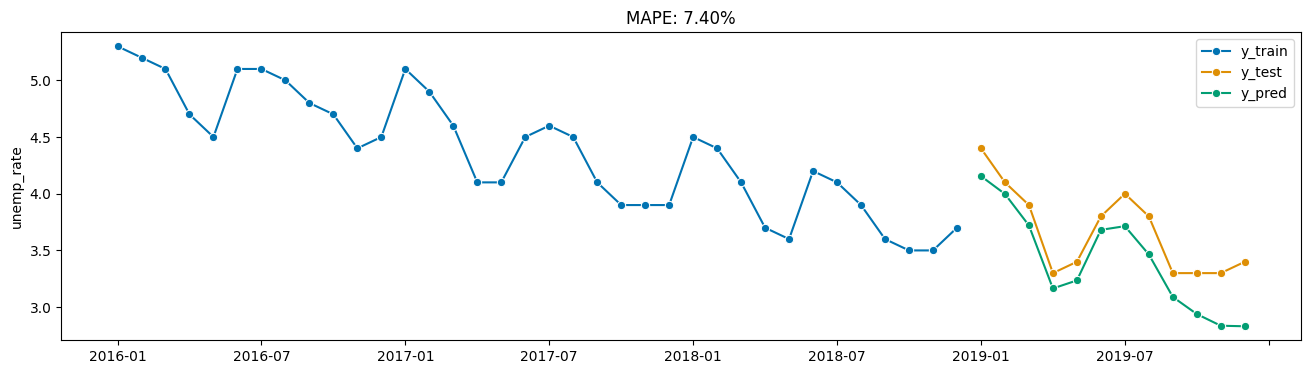

In [ ]:
mape_2 = mean_absolute_percentage_error(y_test, y_pred_2, symmetric=False)

fig,ax = plot_series(y_train["2016":], y_test, y_pred_2, labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_2:.2f}%")

In [ ]:
cv = ExpandingWindowSplitter(
    fh=list(range(1,13)),
    initial_window=12*5,
    step_length=12
)

cv_df = evaluate(
    forecaster=rf_pipe,
    y=y,
    cv=cv,
    strategy="refit",
    return_data=True
)

cv_df

In [ ]:
for ind, row in cv_df.iterrows():
  print(f"Fold {ind} ----")
  print(f"Training: {row["y_train"].index.min()} - {row["y_train"].index.max()}")
  print(f"Test: {row["y_test"].index.min()} - {row["y_test"].index.max()}")

In [ ]:
n_fold = len(cv_df)

plot_series(y, *[cv_df["y_pred"].iloc[x] for x in range(n_fold)],
            markers=["o", *["."] * n_fold],
            labels=["y_true"] + [f"cv: {x}" for x in range(n_fold)])

TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'pandas._libs.missing.NAType'>

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [ ]:
ensemble = EnsembleForecaster(
    forecasters = [("autoarima", AutoARIMA(sp=12)),
                   ("rf_pipe", rf_pipe)]
)
ensemble.fit(y_train)
y_pred_3 = ensemble.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Text(0.5, 1.0, 'MAPE: 6.51%')

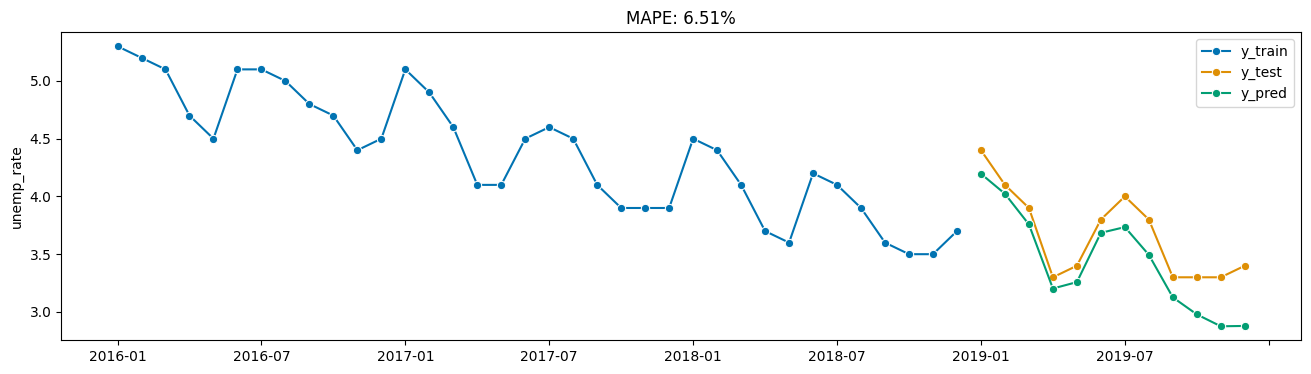

In [ ]:
mape_3 = mean_absolute_percentage_error(y_test, y_pred_3, symmetric=False)
fig,ax = plot_series(y_train["2016":], y_test, y_pred_3, labels=["y_train", "y_test", "y_pred"])
ax.set_title(f"MAPE: {100*mape_3:.2f}%")